In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az

# Sampling the Imaginary 

### Code 3.1

In [2]:
p_positive_vampire = .95
p_positive_mortal = .01
p_vampire = .001

p_mortal = 1 - p_vampire
p_positive = p_positive_vampire * p_vampire + p_positive_mortal * p_mortal

p_vampire_positive = (p_vampire * p_positive_vampire) / p_positive

print(f"P(vampire|positve) = {p_vampire_positive*100:.1f}%")

P(vampire|positve) = 8.7%


### Code 3.2

In [3]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9, prior='uniform'):
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    if prior == 'uniform':
        prior = np.repeat(5, grid_points)  # uniform
    elif prior == 'truncated':
        prior = (p_grid >= 0.5).astype(int)  # truncated
    elif prior == 'double_exp':
        prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp
    else:
        raise ValueError("prior not valid")
        
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior


p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)

### Code 3.3

In [4]:
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

### Code 3.4

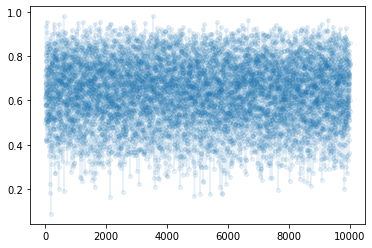

In [5]:
plt.plot(samples, marker='o', alpha=.1, markersize=4)

### Code 3.5

<AxesSubplot:ylabel='Density'>

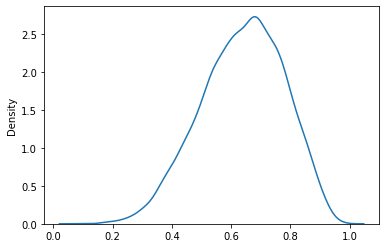

In [6]:
sns.kdeplot(samples)

### Code 3.6

In [7]:
posterior[p_grid < .5].sum()

0.17187458902022873

### Code 3.7

In [8]:
(samples < .5).mean()

0.1702

### Code 3.8

In [9]:
((samples > .5) & (samples < .75)).mean()

0.5988

### Code 3.9

In [10]:
np.quantile(samples, .8)

0.7627627627627628

### Code 3.10

In [11]:
np.quantile(samples, [.1, .9])

array([0.44744745, 0.81491491])

### Code 3.11

In [37]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### Code 3.12

In [38]:
np.quantile(samples, [.25, .75])

array([0.71717172, 0.93939394])

### Code 3.13

In [39]:
az.hdi(samples, .5)

array([0.84848485, 1.        ])

### Code 3.14

In [40]:
p_grid[np.argmax(posterior)]

1.0

### Code 3.15

In [41]:
stats.mode(samples)[0]

array([0.98989899])

### Code 3.16

In [42]:
print(samples.mean())
print(np.quantile(samples, .5))

0.8062252525252527
0.8484848484848485


### Code 3.17

In [43]:
(np.abs((p_grid - .5)) * posterior).sum()

0.31626874808692995

### Code 3.18

In [49]:
loss = np.array([(np.abs(p_grid - x) * posterior).sum() for x in p_grid])

### Code 3.19

In [50]:
p_grid[np.argmin(loss)]

0.8484848484848485

### Figure 3.3

In [16]:
def plot_pi_hdi(samples: np.ndarray, p_grid: np.ndarray, posterior: np.ndarray):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

    ax1.plot(p_grid, posterior, color='black')
    qmin, qmax = np.quantile(samples, [.25, .75])
    mask = np.where((p_grid > qmin) & (p_grid < qmax), posterior, np.nan)
    ax1.fill_between(p_grid, 0, mask)
    ax1.set_xlabel("proportion water (p)")
    ax1.set_ylabel("Density")
    ax1.set_title("50% Percentile Interval")

    ax2.plot(p_grid, posterior, color='black')
    qmin, qmax = az.hdi(samples, .5)
    mask = np.where((p_grid > qmin) & (p_grid < qmax), posterior, np.nan)
    ax2.fill_between(p_grid, 0, mask)
    ax2.set_xlabel("proportion water (p)")
    ax2.set_ylabel("Density")
    ax2.set_title("50% HPDI")

    plt.show()

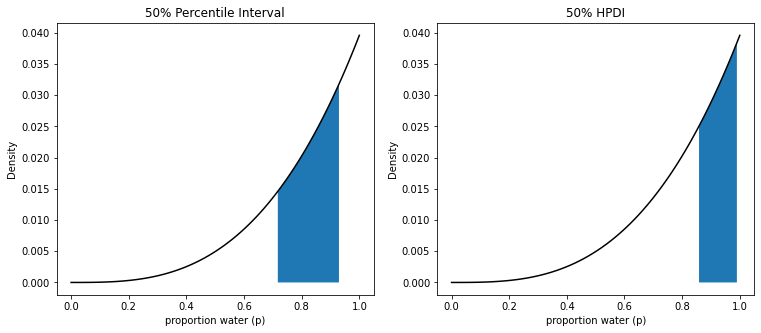

In [17]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
plot_pi_hdi(samples, p_grid, posterior)

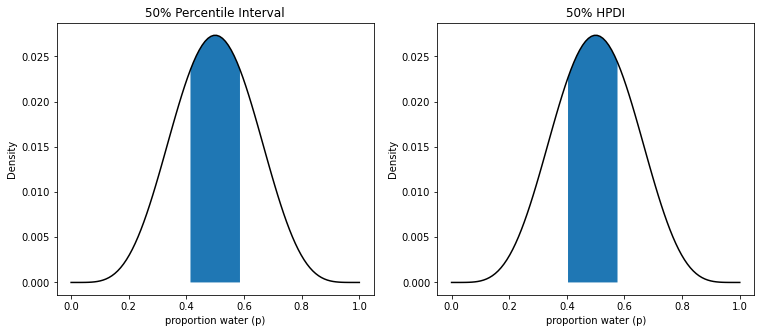

In [31]:
p_grid, posterior = posterior_grid_approx(success=5, tosses=10)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
plot_pi_hdi(samples, p_grid, posterior)